# ***House Price Prediction***

**Import all the required libraries**

In [257]:

import numpy as np #Library for numerical operations
import pandas as pd #Library for data analysis
import seaborn as sns #Library for visualizations
import matplotlib.pyplot as plt #Library for visualizations

#Functions for model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#Functions for statistical operations
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#Functions for calculating Mean Absolute Error(MAE) and Mean Squared Error(MSE)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Functions for splitting data into different forms
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

#Function for dealing the missing values via imputation
from sklearn.impute import SimpleImputer

#Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#Functions building neural networks
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback in the NN
import keras_tuner
from kerastuner.tuners import RandomSearch # HyperParameter Tunining
from sklearn.preprocessing import StandardScaler#Standardising the data
from sklearn.ensemble import IsolationForest #isolation forest for the remove outliers
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go


**Overview of Data**

In [60]:
data_train = pd.read_csv(r"C:\Users\tarun\OneDrive\Desktop\ML\train.csv")
data_test = pd.read_csv(r"C:\Users\tarun\OneDrive\Desktop\ML\test.csv")
data_train.shape

(1460, 81)

In [61]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:
data_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [63]:
data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [64]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [65]:
# Checking if column headings are the same in both data set
dif_1 = [x for x in data_train.columns if x not in data_test.columns]
print(f"Columns present in df_train and absent in df_test: {dif_1}\n")

dif_2 = [x for x in data_test.columns if x not in data_train.columns]
print(f"Columns present in df_test set and absent in df_train: {dif_2}")

Columns present in df_train and absent in df_test: ['SalePrice']

Columns present in df_test set and absent in df_train: []


In [143]:
# Drop the 'Id' column from the training set
data_train.drop(["Id"], axis=1, inplace=True)

# Save the 'Id' list before dropping it from the test set
Id_test_list = data_test["Id"].tolist()
data_test.drop(["Id"], axis=1, inplace=True)

In [66]:
print(f"Training set shape: {data_train.shape}\n")
print(f"Test set shape: {data_test.shape}\n")

Training set shape: (1460, 81)

Test set shape: (1459, 80)



**Numerical Data**

In [67]:
# Select numerical columns from the training dataset
numerical_cols = [cname for cname in data_train.columns if 
                  data_train[cname].dtype in ['int64', 'float64']]

numerical_cols_test = [cname for cname in data_test.columns if 
                      data_test[cname].dtype in ['int64', 'float64']]

data_train_num = data_train[numerical_cols].copy()
data_test_num = data_test[numerical_cols_test].copy()

data_train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


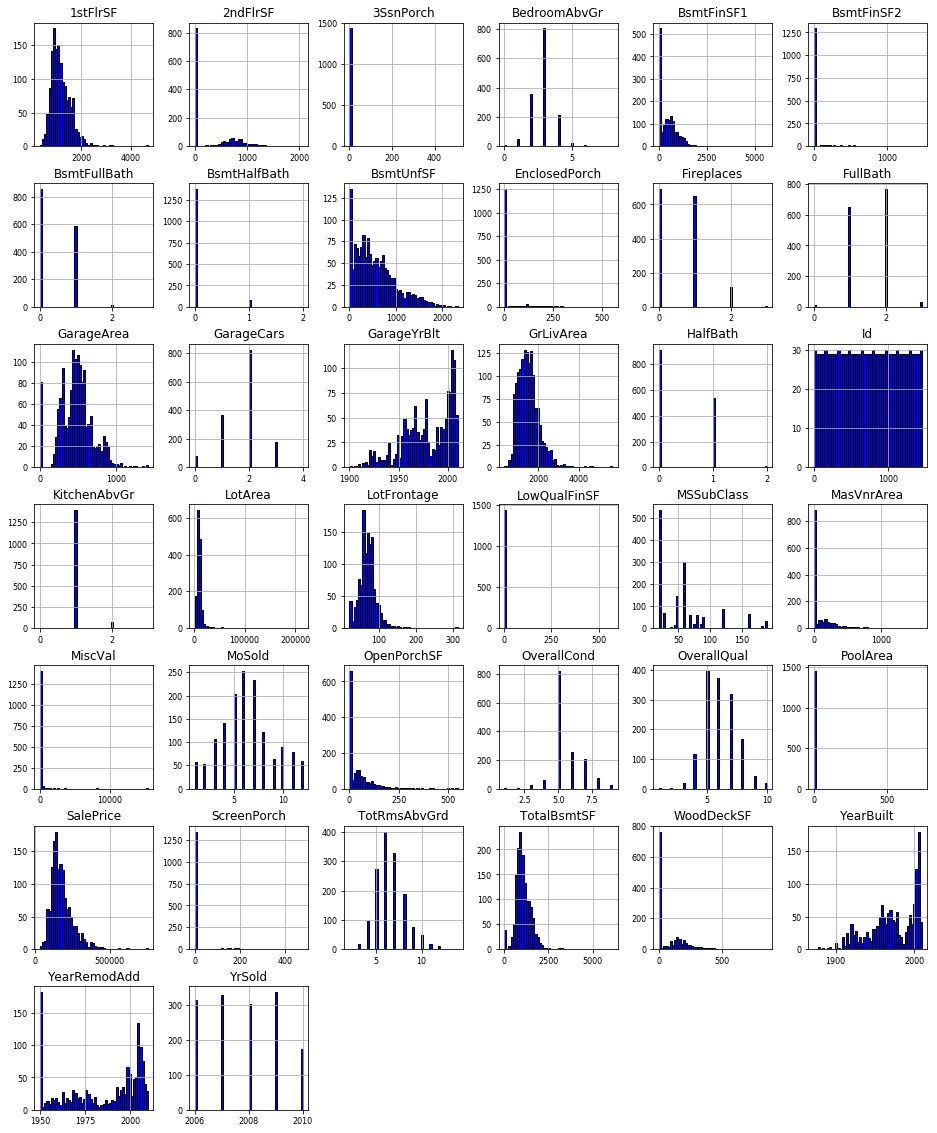

In [68]:
fig_ = data_train.hist(figsize=(16, 20), bins=50, color="blue",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

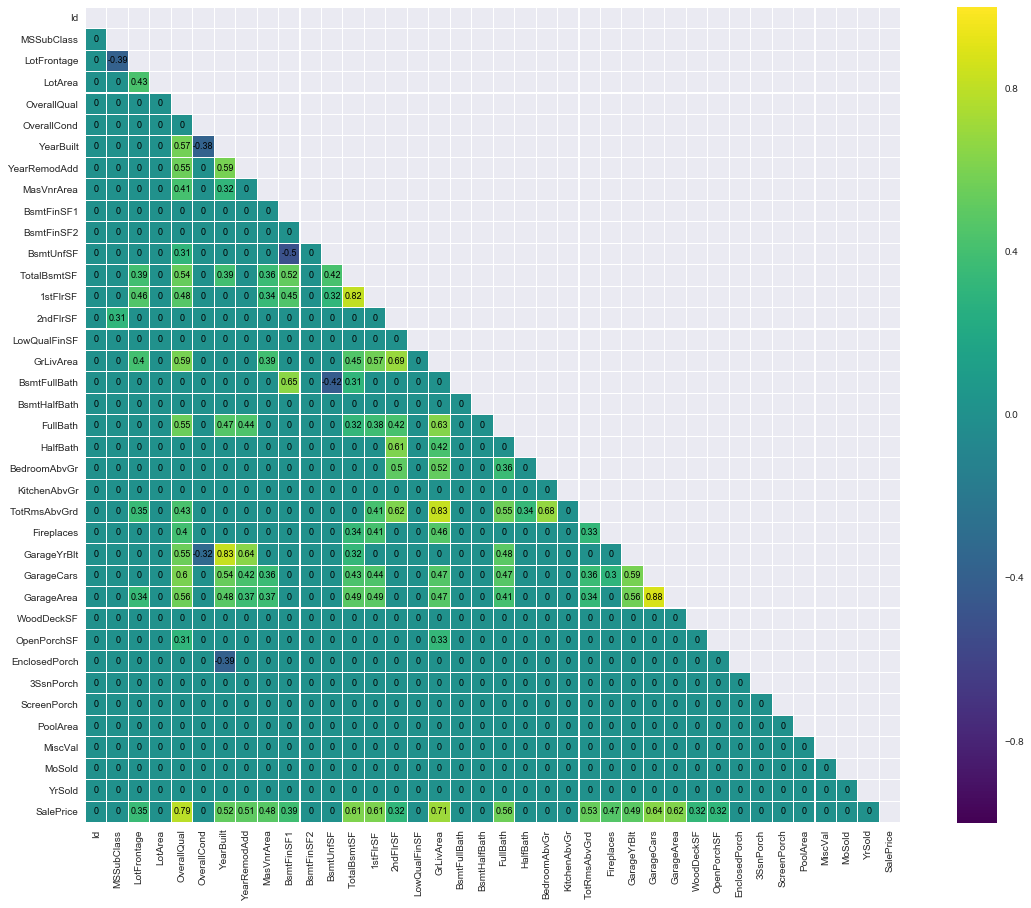

In [70]:
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix
corr_matrix = data_train.corr()

# Replace any correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [75]:
# Select features where the correlation with 'SalePrice' is higher than |0.3|
# -1 because the latest row is SalePrice
data_num_corr = data_train_num.corr()["SalePrice"][:-1]

# Correlated features (r2 > 0.5)
high_features_list = data_num_corr[abs(data_num_corr) >= 0.5].sort_values(ascending=False)
print(f"{len(high_features_list)} strongly correlated values with SalePrice:\n{high_features_list}\n")

# Correlated features (0.3 < r2 < 0.5)
low_features_list = data_num_corr[(abs(data_num_corr) < 0.5) & (abs(data_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(low_features_list)} slightly correlated values with SalePrice:\n{low_features_list}")

10 strongly correlated values with SalePrice:
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 slightly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


C:\Users\tarun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



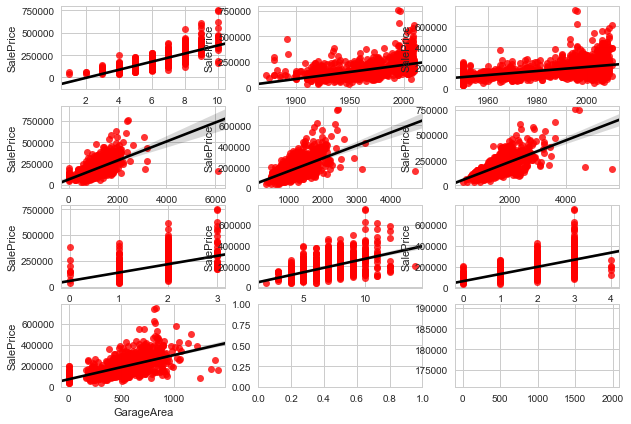

In [218]:
# Features with high correlation (higher than 0.5)
strong_features = data_num_corr[abs(data_num_corr) >= 0.5].index.tolist()
strong_features.append("SalePrice")

data_strong_features = data_train_num.loc[:, strong_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(strong_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(strong_features)-1:
        sns.regplot(x=strong_features[i], y="SalePrice", data=data_strong_features, ax=ax, scatter_kws={
                    "color": "red"}, line_kws={"color": "black"})

C:\Users\tarun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



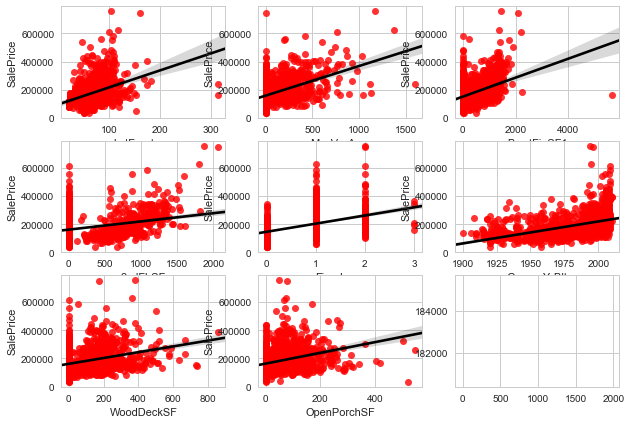

In [219]:
# Features with low correlation (between 0.3 and 0.5)
low_features = data_num_corr[(abs(data_num_corr) >= 0.3) & (abs(data_num_corr) < 0.5)].index.tolist()
low_features.append("SalePrice")

data_low_features = data_train_num.loc[:, low_features]

plt.style.use("seaborn-whitegrid")  # define figures style
fig, ax = plt.subplots(round(len(low_features) / 3), 3)

for i, ax in enumerate(fig.axes):
    # plot the correlation of each feature with SalePrice
    if i < len(low_features) - 1:
        sns.regplot(x=low_features[i], y="SalePrice", data=data_low_features, ax=ax, scatter_kws={
                    "color": "red"}, line_kws={"color": "black"},)

In [76]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + low_features

print("List of features to be kept in the dataset:")
print(list_of_numerical_features)

# Select these features form our training set
data_train_num = data_train_num.loc[:, list_of_numerical_features]

# Select the same features from the test set (-1 -> except 'SalePrice')
data_test_num = data_test_num.loc[:, list_of_numerical_features[:-1]]

List of features to be kept in the dataset:
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


**Missing Values**

Columns with missing (NA) values:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


Text(0,0.5,'Column Name\n')

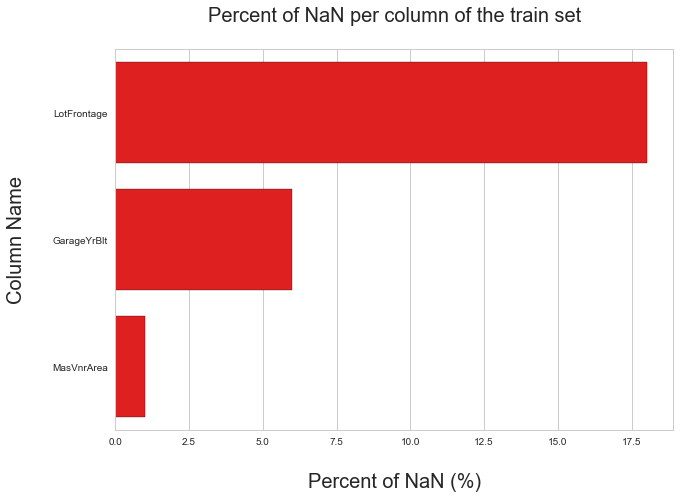

In [220]:
cols_with_missing = [col for col in data_train_num.columns
                     if data_train_num[col].isnull().any()]

print("Columns with missing (NA) values:")
print(cols_with_missing)

# Count how many NA values are in each of those columns
cols_nan_count = list(map(lambda col: round(data_train_num[col].isna().sum()*100/len(data_train_num)), cols_with_missing))


tab = pd.DataFrame(cols_with_missing, columns=["Column"])
tab["Percent_NaN"] = cols_nan_count
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="red")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [78]:
my_imputer = SimpleImputer(strategy="median")
data_train_imputed = pd.DataFrame(my_imputer.fit_transform(data_train_num))
data_train_imputed.columns = data_train_num.columns

In [79]:
# Drop 'LotFrontage' and 'GarageYrBlt'
data_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
data_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"2,003.00","2,003.00",856.00,856.00,"1,710.00",2.00,8.00,2.00,548.00,196.00,706.00,854.00,0.00,0.00,61.00,"208,500.00"
1,6.00,"1,976.00","1,976.00","1,262.00","1,262.00","1,262.00",2.00,6.00,2.00,460.00,0.00,978.00,0.00,1.00,298.00,0.00,"181,500.00"
2,7.00,"2,001.00","2,002.00",920.00,920.00,"1,786.00",2.00,6.00,2.00,608.00,162.00,486.00,866.00,1.00,0.00,42.00,"223,500.00"
3,7.00,"1,915.00","1,970.00",756.00,961.00,"1,717.00",1.00,7.00,3.00,642.00,0.00,216.00,756.00,1.00,0.00,35.00,"140,000.00"
4,8.00,"2,000.00","2,000.00","1,145.00","1,145.00","2,198.00",2.00,9.00,3.00,836.00,350.00,655.00,"1,053.00",1.00,192.00,84.00,"250,000.00"


In [80]:
# Drop these same features from test set
data_test_num.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)

Columns with missing (NA) values:
['TotalBsmtSF', 'GarageCars', 'GarageArea', 'MasVnrArea', 'BsmtFinSF1']


Text(0,0.5,'Column Name\n')

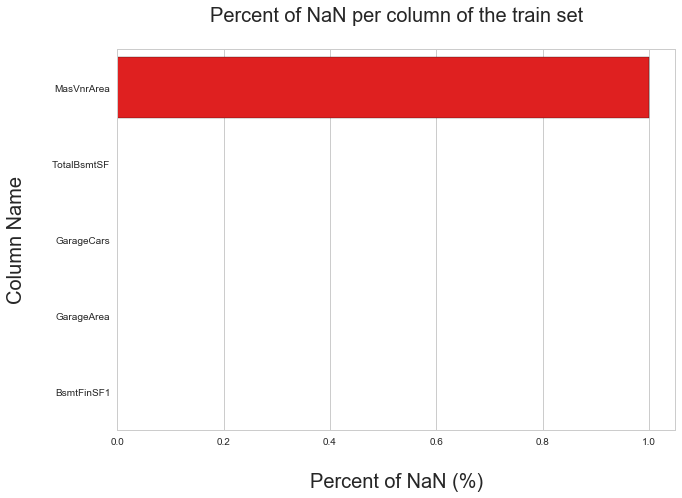

In [221]:
# Get names of columns with missing values (test set)
cols_with_missing_b = [col for col in data_test_num.columns
                       if data_test_num[col].isnull().any()]

print("Columns with missing (NA) values:")
print(cols_with_missing_b)

# Count how many NA values are in each of those columns
cols_nan_count_b = list(map(lambda col: round(data_test_num[col].isna().sum()*100/len(data_test_num)), cols_with_missing_b))


tab = pd.DataFrame(cols_with_missing_b, columns=["Column"])
tab["Percent_NaN"] = cols_nan_count_b
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="red")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [82]:
# Imputation of missing values (NaNs) with SimpleImputer
my_imputer = SimpleImputer(strategy="median")
data_test_imputed = pd.DataFrame(my_imputer.fit_transform(data_test_num))
data_test_imputed.columns = data_test_num.columns

In [60]:
print(f"Training set shape (Numerical features): {data_train_imputed.shape}\n")
print(f"Test set shape (Numerical features): {data_test_imputed.shape}\n")

Training set shape (Numerical features): (1460, 16)

Test set shape (Numerical features): (1459, 15)



**Categorical Data**

In [83]:
# Categorical to Quantitative relationship
categorical_features = [
    i for i in data_train.columns if data_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
data_train_categ = data_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
data_test_categ = data_test[categorical_features[:-1]]

In [84]:
print(f"Training set shape (Categorical features): {data_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {data_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 44)

Test set shape (Categorical features): (1459, 43)



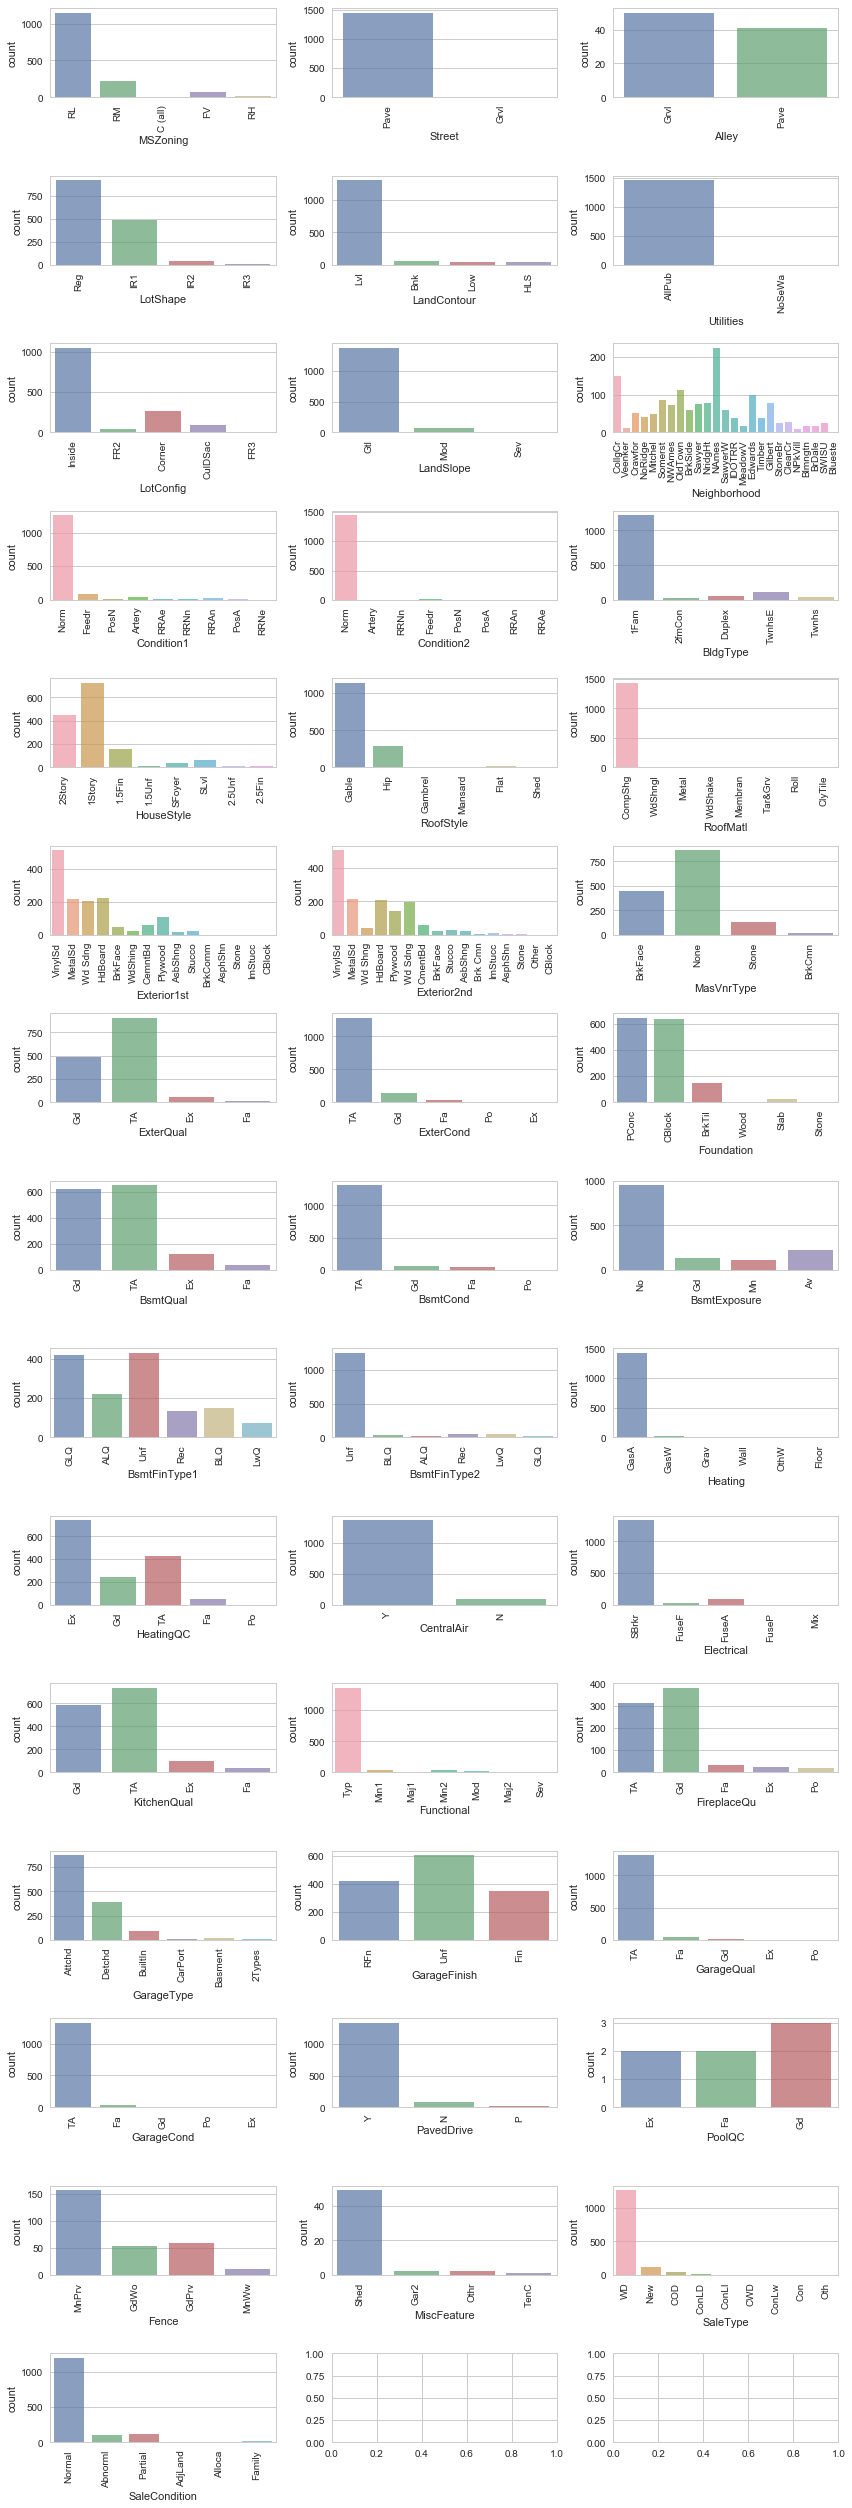

In [85]:
# Countplot for each of the categorical features in the training set
# Determine which categorical features are dominated by one outcome
fig, axes = plt.subplots(round(len(data_train_categ.columns) / 3), 3, figsize=(12, 35))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(data_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=data_train_categ.columns[i], alpha=0.7, data=data_train_categ, ax=ax)

fig.tight_layout()

In [86]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]

# Training set
data_train_categ.drop(cols_to_drop, axis=1, inplace=True)

# Test set
data_test_categ.drop(cols_to_drop, axis=1, inplace=True)


C:\Users\tarun\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
print(f"Training set shape (Categorical features): {data_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {data_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 29)

Test set shape (Categorical features): (1459, 28)



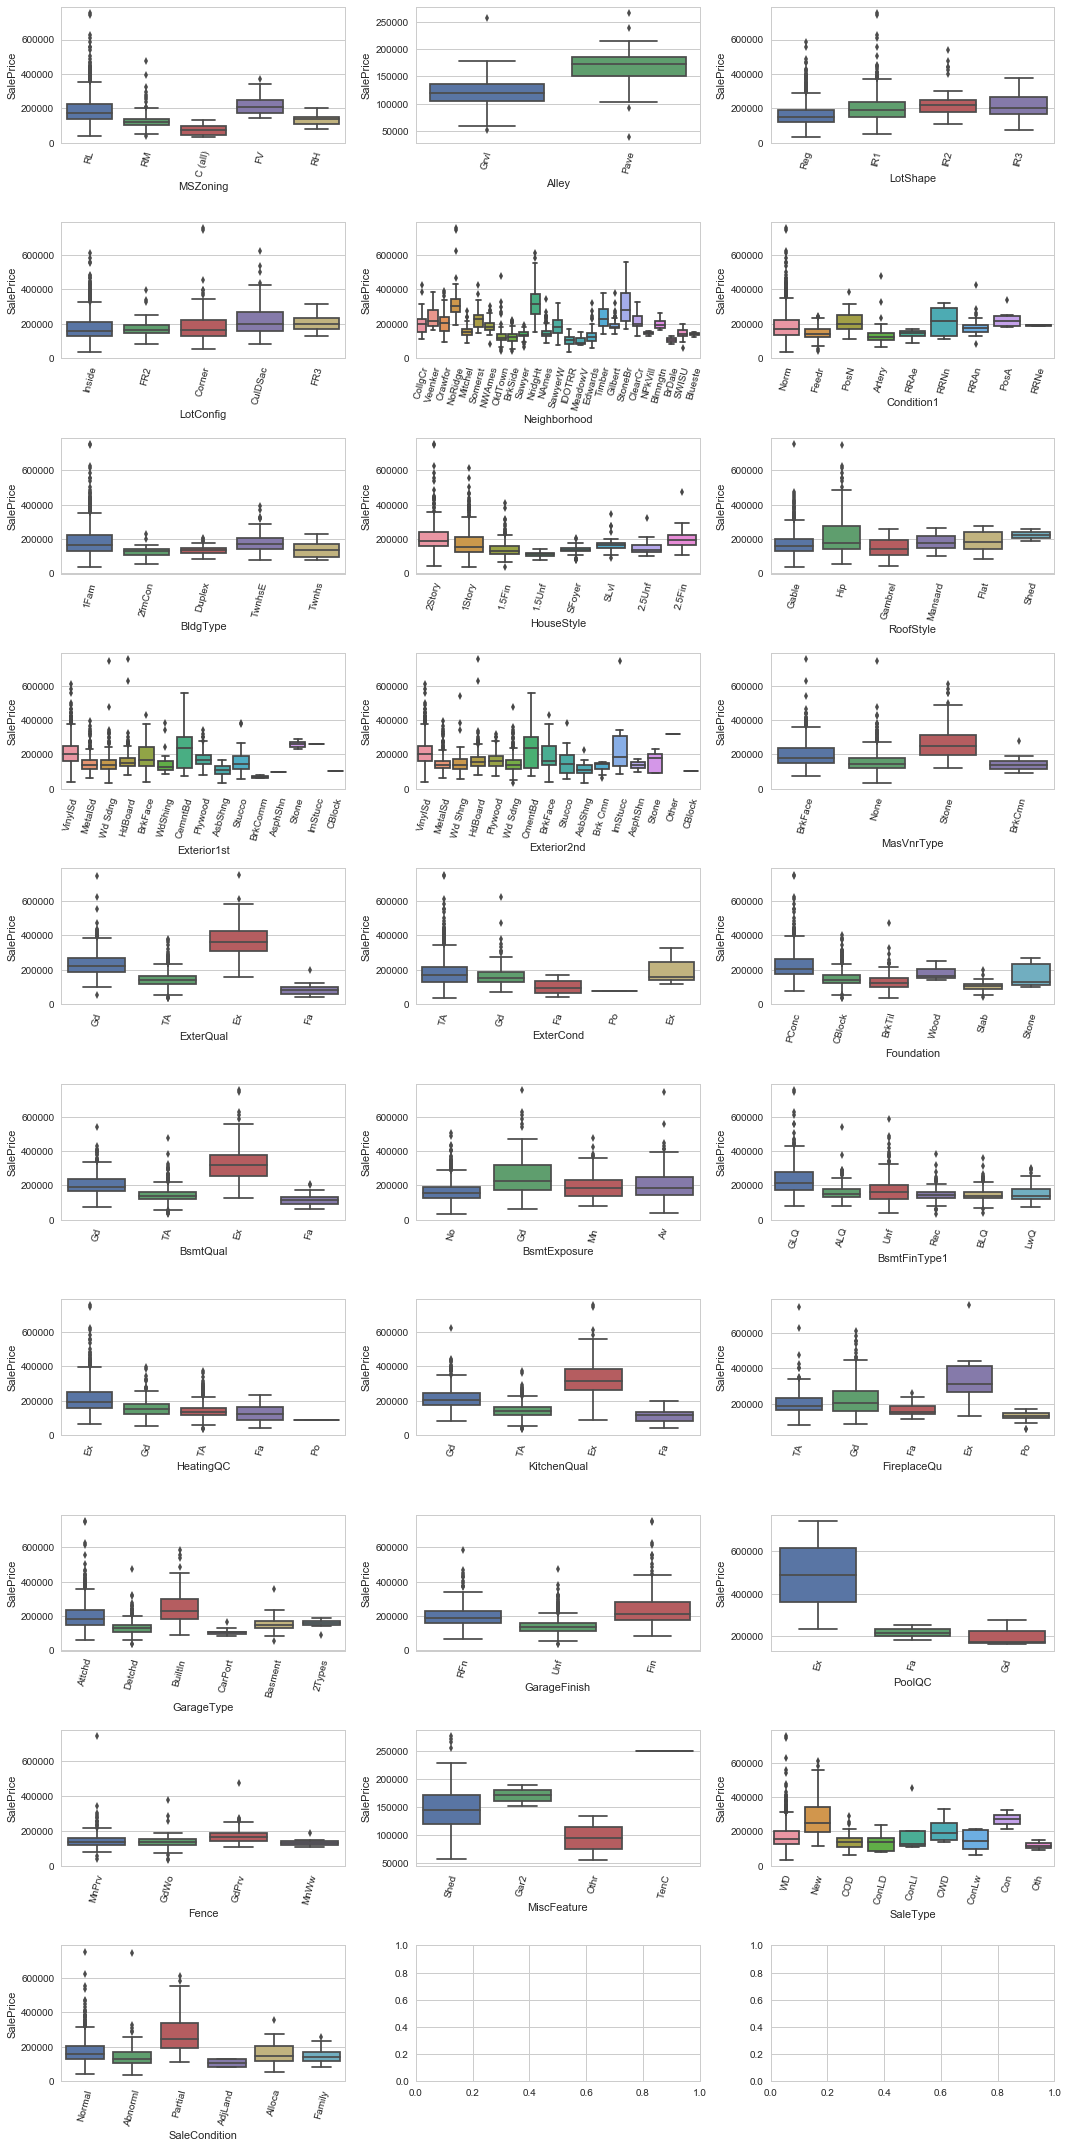

In [88]:
# With the boxplot we can see the variation of the target 'SalePrice' in each of the categorical features
fig, axes = plt.subplots(
    round(len(data_train_categ.columns)/3), 3, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(data_train_categ.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(
            x=data_train_categ.columns[i], y="SalePrice", data=data_train_categ, ax=ax)

fig.tight_layout()

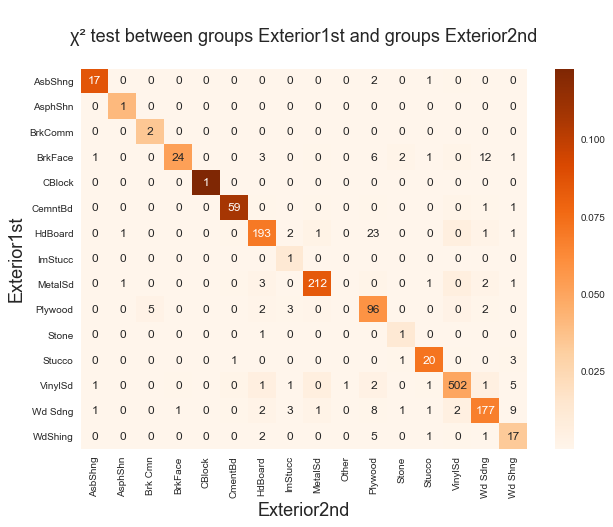

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0

significance=0.050, p=0.000
Dependent (reject H0)


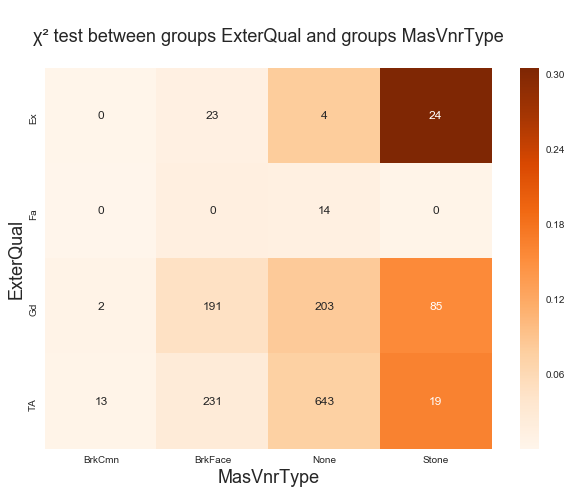

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54

significance=0.050, p=0.000
Dependent (reject H0)


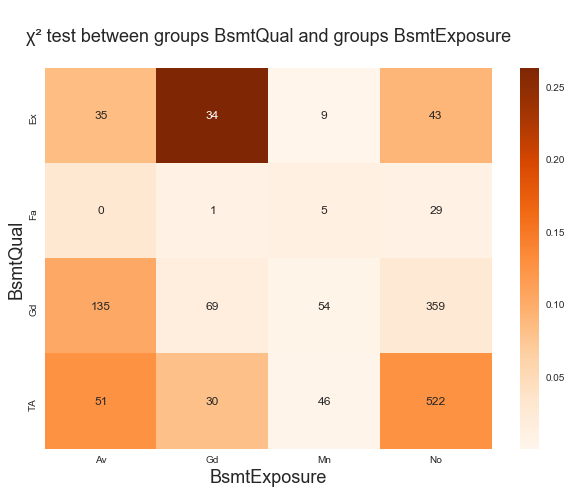

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32

significance=0.050, p=0.000
Dependent (reject H0)


In [89]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

# Parameters for Chi-squared test (5% significance level)
prob = 0.95
alpha = 1.0 - prob

for i, j in zip(X, Y):

    # Contingency table
    cont = data_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(data_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=data_train_categ[i], columns=data_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")
    print('significance=%.3f, p=%.3f' % (alpha, ChiSqResult[1]))
    if ChiSqResult[1] <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [90]:
# Drop the one of each co-dependent variables
# Training set
data_train_categ.drop(Y, axis=1, inplace=True)

# Test set
data_test_categ.drop(Y, axis=1, inplace=True)

C:\Users\tarun\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [91]:
print(f"Training set shape (Categorical features): {data_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {data_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 26)

Test set shape (Categorical features): (1459, 25)



**Missing values**

Categorical Columns with missing (NA) values:
['Alley', 'BsmtQual', 'BsmtFinType1', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence', 'MiscFeature']


Text(0,0.5,'Column Name\n')

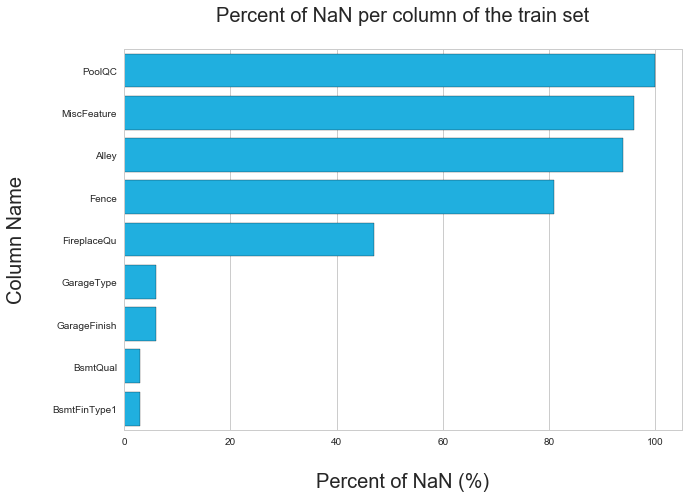

In [92]:
# Get names of categorical columns with missing values (training set)
cat_cols_with_missing = [col for col in data_train_categ.columns
                         if data_train_categ[col].isnull().any()]

print("Categorical Columns with missing (NA) values:")
print(cat_cols_with_missing)

# Count how many NA values are in each of those columns
cat_cols_nan_count = list(map(lambda col: round(data_train_categ[col].isna().sum()*100/len(data_train_categ)), 
                              cat_cols_with_missing))


tab_cat = pd.DataFrame(cat_cols_with_missing, columns=["Column"])
tab_cat["Percent_NaN"] = cat_cols_nan_count
tab_cat.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab_cat,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [93]:
# Drop categorical columns that have at least 30% missing values
large_na = [col for col in cat_cols_with_missing if (data_train_categ[col].isna().sum()/data_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

data_train_categ.drop(large_na, axis=1, inplace=True)

Columns to be dropped:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


C:\Users\tarun\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [94]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": data_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": data_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": data_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": data_train_categ["BsmtFinType1"].mode().iloc[0]}

data_train_categ = data_train_categ.fillna(value=categ_fill_null)

Categorical Columns with missing (NA) values:
['MSZoning', 'Exterior1st', 'BsmtQual', 'BsmtFinType1', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType']


C:\Users\tarun\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0,0.5,'Column Name\n')

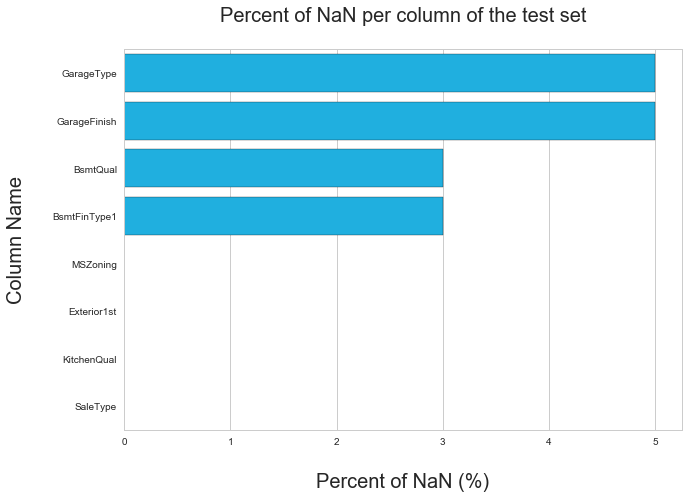

In [95]:
# Drop the same categorical columns from the test set
data_test_categ.drop(large_na, axis=1, inplace=True)

# Get names of categorical columns with missing values (test set)
cat_cols_with_missing_t = [col for col in data_test_categ.columns
                           if data_test_categ[col].isnull().any()]

print("Categorical Columns with missing (NA) values:")
print(cat_cols_with_missing_t)

# Count how many NA values are in each of those columns
cat_cols_nan_count_t = list(map(lambda col: round(data_test_categ[col].isna().sum()*100/len(data_test_categ)), 
                              cat_cols_with_missing_t))


tab_cat_t = pd.DataFrame(cat_cols_with_missing_t, columns=["Column"])
tab_cat_t["Percent_NaN"] = cat_cols_nan_count_t
tab_cat_t.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab_cat_t,
                edgecolor="black", color="deepskyblue")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [96]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": data_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": data_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": data_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": data_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": data_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": data_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": data_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": data_test_categ["SaleType"].mode().iloc[0]}

data_test_categ = data_test_categ.fillna(value=categ_fill_null)

In [97]:
print(f"Training set shape (Categorical features): {data_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {data_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 21)

Test set shape (Categorical features): (1459, 20)



In [98]:
data_train_categ.drop(["SalePrice"], axis = 1, inplace = True)

# Use get_dummies to transform the Categorical features into Binary features (Training dataset)
data_train_dummies = pd.get_dummies(data_train_categ)
data_train_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [99]:
# Apply get_dummies to the test dataset as well
data_test_dummies = pd.get_dummies(data_test_categ)
data_test_dummies.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [100]:
# Check if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in data_train_dummies.columns if x not in data_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in data_test_dummies.columns if x not in data_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: ['HouseStyle_2.5Fin', 'Exterior1st_ImStucc', 'Exterior1st_Stone']

Features present in df_test_categ set and absent in df_train_categ: []


In [101]:
# Drop the columns listed in dif_1 from data_train_dummies
data_train_dummies.drop(dif_1, axis=1, inplace=True)

# Check again if the column headings are the same in both data sets: data_train_dummies and data_test_dummies
dif_1 = [x for x in data_train_dummies.columns if x not in data_test_dummies.columns]
print(f"Features present in df_train_categ and absent in df_test_categ: {dif_1}\n")

dif_2 = [x for x in data_test_dummies.columns if x not in data_test_dummies.columns]
print(f"Features present in df_test_categ set and absent in df_train_categ: {dif_2}")

Features present in df_train_categ and absent in df_test_categ: []

Features present in df_test_categ set and absent in df_train_categ: []


In [102]:
print(f"Training set shape (Categorical features): {data_train_dummies.shape}\n")
print(f"Test set shape (Categorical features): {data_test_dummies.shape}\n")

Training set shape (Categorical features): (1460, 137)

Test set shape (Categorical features): (1459, 137)



**Concatinating all the data**

In [103]:
# Join numerical and categorical datasets together
# Training set
data_train_new = pd.concat([data_train_imputed, data_train_dummies], axis = 1)
print(f"Train set: {data_train_new.shape}")

# Test set
data_test_new = pd.concat([data_test_imputed, data_test_dummies], axis = 1)
print(f"Test set: {data_test_new.shape}")

Train set: (1460, 154)
Test set: (1459, 153)


**Feature Engineering**

In [104]:
# Convert Year of construction to the Age of the house since the construction
data_train_new["AgeSinceConst"] = (data_train_new["YearBuilt"].max() - data_train_new["YearBuilt"])

data_test_new["AgeSinceConst"] = (data_test_new["YearBuilt"].max() - data_test_new["YearBuilt"])

# Drop "YearBuilt"
data_train_new.drop(["YearBuilt"], axis=1, inplace=True)
data_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [105]:
# Convert Year of remodeling to the Age of the house since the remodeling
data_train_new["AgeSinceRemod"] = (data_train_new["YearRemodAdd"].max() - data_train_new["YearRemodAdd"])

data_test_new["AgeSinceRemod"] = (data_test_new["YearRemodAdd"].max() - data_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
data_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
data_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

In [106]:
continuous_features = ['AgeSinceConst', 'AgeSinceRemod', 'MasVnrArea', 'BsmtFinSF1',
                      'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
                      'WoodDeckSF', 'OpenPorchSF']

In [107]:
data_skew_verify = data_train_new.loc[:, continuous_features]

# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(data_skew_verify[i].skew()))

data_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})

sk_features = data_skewed[data_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")

List of skewed features: ['AgeSinceConst', 'AgeSinceRemod', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF']


In [108]:
# Log transformation of the target variable "SalePrice"
data_train_new["SalePriceLog"] = np.log(data_train_new.SalePrice)

# Drop the original SalePrice
data_train_new.drop(["SalePrice"], axis=1, inplace=True)

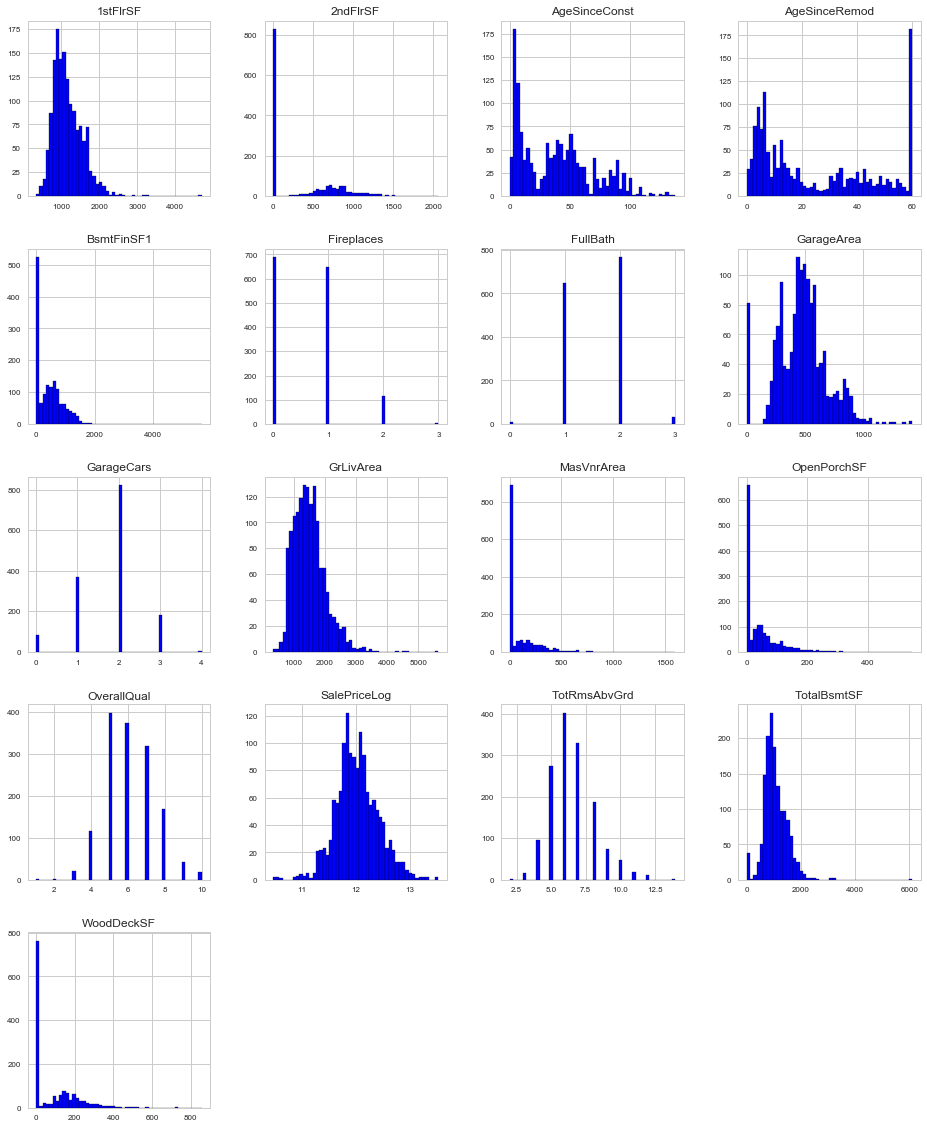

In [224]:
numerical_cols_new = [cname for cname in data_train_new.columns if 
                      data_train_new[cname].dtype in ['int64', 'float64']]

data_train_new_num = data_train_new[numerical_cols_new].copy()

# Plot the distribution of all the numerical features
fig_ = data_train_new_num.hist(figsize=(16, 20), bins=50, color="blue",
                               edgecolor="black", xlabelsize=8, ylabelsize=8)

**Split the data**

In [110]:
# TRAINING DATASET
# Feature variables
X = data_train_new.copy().drop(["SalePriceLog"], axis = 1)

# Target Variable
y = data_train_new.loc[:, "SalePriceLog"]

print(X.shape)
print(y.shape)

(1460, 153)
(1460,)


In [111]:
# Split the data into Training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")
print(f"\nX_test:{X_test.shape}\ny_test:{y_test.shape}")

X_train:(1168, 153)
y_train:(1168,)

X_test:(292, 153)
y_test:(292,)


In [47]:
model_lin = LinearRegression()
model_tree = DecisionTreeRegressor()
model_ran = RandomForestRegressor()
model_xg = XGBRegressor()

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [112]:
scores_lin = -1 * cross_val_score(model_lin, X_train, y_train,
                                  cv=5,
                                  scoring='neg_mean_squared_error')

print("MSE scores (Linear Model):\n", scores_lin)
print("Mean MSE scores:", scores_lin.mean())

MSE scores (Linear Model):
 [0.02178461 0.02284472 0.04772085 0.02147904 0.01754126]
Mean MSE scores: 0.02627409691652524


In [93]:
model_lin.fit(X_train, y_train)
y_pred_lin = model_lin.predict(X_test)
print_score(y_test, y_pred_lin, "Linear")

- Regressor: Linear
R²: 0.8978626304119314
RMSE: 0.13805873345578332



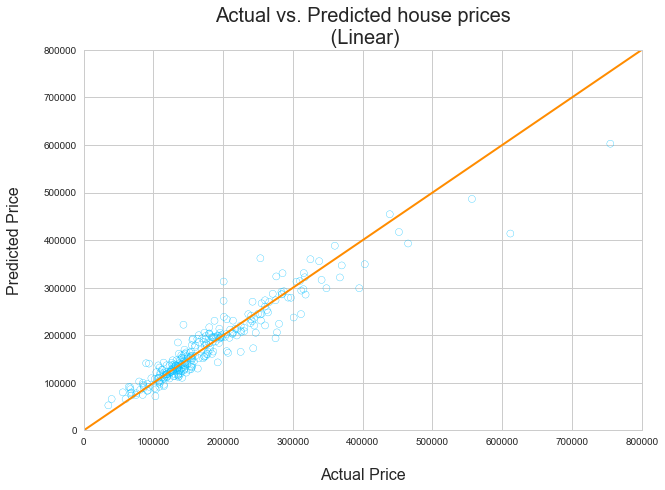

In [94]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Linear)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_lin),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

**Decision Tree**

In [113]:
scores_tree = -1 * cross_val_score(model_tree, X_train, y_train,
                                   cv=5,
                                   scoring='neg_mean_squared_error')

print("MSE scores (Decision Tree Model):\n", scores_tree)
print("Mean MSE scores:", scores_tree.mean())

MSE scores (Decision Tree Model):
 [0.05315399 0.0507445  0.04104296 0.04209321 0.04113118]
Mean MSE scores: 0.045633169290384995


In [114]:
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
print_score(y_test, y_pred_tree, "Decision Tree")

- Regressor: Decision Tree
R²: 0.7893269900941973
RMSE: 0.19827867151661943



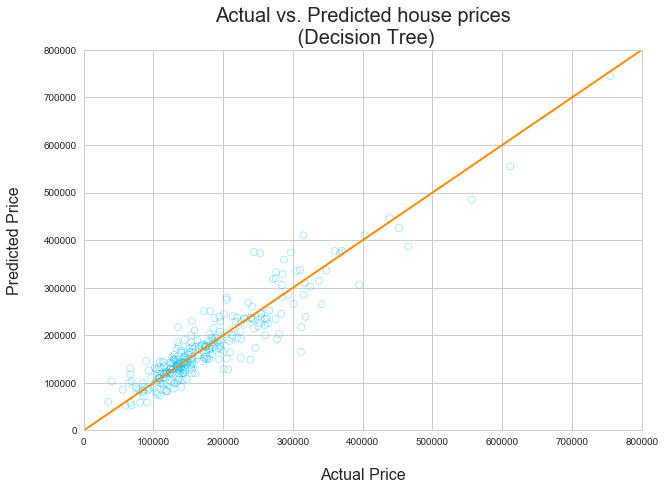

In [115]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Decision Tree)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_tree),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

**Random Forest**

In [116]:
scores_ran = -1 * cross_val_score(model_ran, X_train, y_train,
                                  cv=5,
                                  scoring='neg_mean_squared_error')

print("MSE scores (Random Forest Model):\n", scores_ran)
print("Mean MSE scores:", scores_ran.mean())

MSE scores (Random Forest Model):
 [0.01776587 0.02695386 0.02943625 0.02027471 0.01486048]
Mean MSE scores: 0.021858233997053327


In [117]:
model_ran.fit(X_train, y_train)
y_pred_ran = model_ran.predict(X_test)
print_score(y_test, y_pred_ran, "Random Forest")

- Regressor: Random Forest
R²: 0.8803791726493178
RMSE: 0.1494083781038896



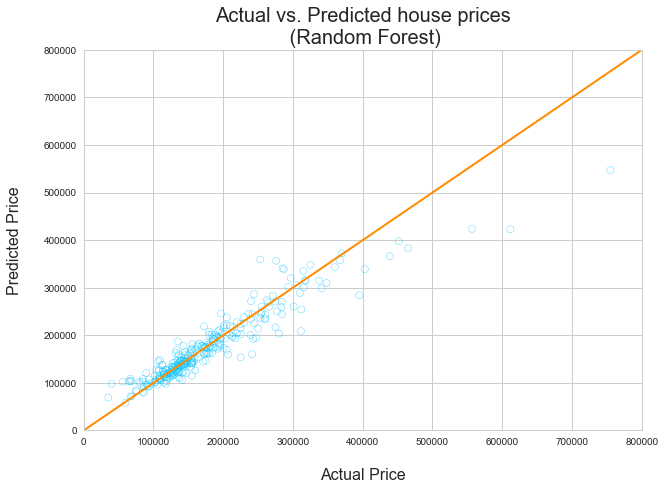

In [100]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Random Forest)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ran),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

**XGBoost**

In [118]:
# Define hyperparameters
tuned_parameters_xgb = {"max_depth": [3],
                        "colsample_bytree": [0.3, 0.7],
                        "learning_rate": [0.01, 0.05, 0.1],
                        "n_estimators": [100, 500, 1000]}

# GridSearch
xgbr_cv = GridSearchCV(estimator=XGBRegressor(),
                       param_grid=tuned_parameters_xgb,
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

# fit the GridSearch on train set
xgbr_cv.fit(X_train, y_train)

# print best params and the corresponding R²
print(f"Best hyperparameters: {xgbr_cv.best_params_}\n")
print(f"Best R²: {xgbr_cv.best_score_}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparameters: {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 1000}

Best R²: 0.8814730000479362


In [140]:
model_xgb_opt = XGBRegressor(colsample_bytree = xgbr_cv.best_params_["colsample_bytree"],
                             learning_rate = xgbr_cv.best_params_["learning_rate"],
                             max_depth = xgbr_cv.best_params_["max_depth"],
                             n_estimators = xgbr_cv.best_params_["n_estimators"])

model_xgb_opt.fit(X_train, y_train)
y_pred_xgb_opt = model_xgb_opt.predict(X_test)
print_score(y_test, y_pred_xgb_opt, "XGBoost")

- Regressor: XGBoost
R²: -0.022933330383491768
RMSE: 4.574575285746506



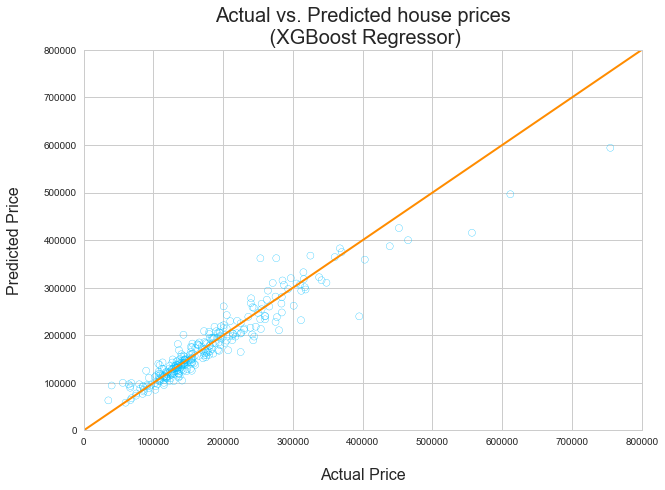

In [103]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (XGBoost Regressor)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb_opt),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

In [144]:
y_pred = np.exp(model_xgb_opt.predict(data_test_new))

output = pd.DataFrame({"Id": Id_test_list,
                       "SalePrice": y_pred})

output.head(10)

,Id,SalePrice
0,1461,"118,688.82"
1,1462,"162,069.11"
2,1463,"182,431.33"
3,1464,"193,152.45"
4,1465,"189,513.03"
5,1466,"180,431.84"
6,1467,"180,180.28"
7,1468,"171,066.81"
8,1469,"182,857.20"
9,1470,"126,484.40"


**Standardizing the data**

In [157]:
scale = StandardScaler()
X = scale.fit_transform(X)

**Model Building**

In [158]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('layers', 2, 10)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mse'])
    return model

In [159]:
tuner = RandomSearch(
    build_model,
    objective='val_mse',
    max_trials=10,
    executions_per_trial=3,
    directory='model_dir',
    project_name='House_Price_Prediction')
tuner.search_space_summary()

Search space summary
Default search space size: 4
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [160]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(320, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(384, activation='relu'))
    model.add(Dense(352, activation='relu'))
    model.add(Dense(448, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(160, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss = 'mse')
    return model

In [161]:
model = create_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 320)               49280     
_________________________________________________________________
dense_26 (Dense)             (None, 384)               123264    
_________________________________________________________________
dense_27 (Dense)             (None, 352)               135520    
_________________________________________________________________
dense_28 (Dense)             (None, 448)               158144    
_________________________________________________________________
dense_29 (Dense)             (None, 160)               71840     
_________________________________________________________________
dense_30 (Dense)             (None, 160)               25760     
_________________________________________________________________
dense_31 (Dense)             (None, 32)               

In [162]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x=X,y=y,
          validation_split=0.1,
          batch_size=128,epochs=1000, callbacks=[early_stop])

Epoch 1/1000
11/11 [==============================] - 0s 15ms/step - loss: 134.1734 - val_loss: 117.8942
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 98.9552 - val_loss: 69.7876
Epoch 3/1000
11/11 [==============================] - 0s 8ms/step - loss: 41.9219 - val_loss: 16.0259
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 17.6353 - val_loss: 13.8233
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 12.1884 - val_loss: 12.4074
Epoch 6/1000
11/11 [==============================] - 0s 6ms/step - loss: 9.9102 - val_loss: 9.7264
Epoch 7/1000
11/11 [==============================] - 0s 7ms/step - loss: 7.7234 - val_loss: 8.5532
Epoch 8/1000
11/11 [==============================] - 0s 7ms/step - loss: 6.3129 - val_loss: 7.6990
Epoch 9/1000
11/11 [==============================] - 0s 7ms/step - loss: 5.1843 - val_loss: 6.8491
Epoch 10/1000
11/11 [==============================] - 0s 8ms/step - loss: 4.1651 - val

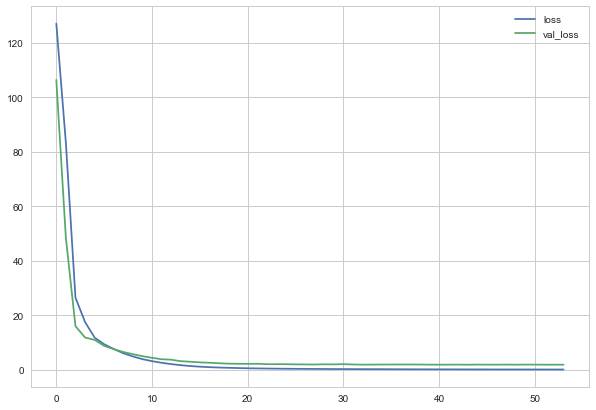

In [129]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [130]:
model=create_model()
history = model.fit(x=X,y=y,
          batch_size=128,epochs=170)

Epoch 1/170
12/12 [==============================] - 0s 5ms/step - loss: 139.6388
Epoch 2/170
12/12 [==============================] - 0s 5ms/step - loss: 116.4331
Epoch 3/170
12/12 [==============================] - 0s 6ms/step - loss: 66.5961
Epoch 4/170
12/12 [==============================] - 0s 6ms/step - loss: 19.6469
Epoch 5/170
12/12 [==============================] - 0s 4ms/step - loss: 13.1795
Epoch 6/170
12/12 [==============================] - 0s 5ms/step - loss: 10.9761
Epoch 7/170
12/12 [==============================] - 0s 6ms/step - loss: 8.3026
Epoch 8/170
12/12 [==============================] - 0s 6ms/step - loss: 6.7050
Epoch 9/170
12/12 [==============================] - 0s 7ms/step - loss: 5.4450
Epoch 10/170
12/12 [==============================] - 0s 7ms/step - loss: 4.4443
Epoch 11/170
12/12 [==============================] - 0s 6ms/step - loss: 3.6939
Epoch 12/170
12/12 [==============================] - 0s 6ms/step - loss: 3.1129
Epoch 13/170
12/12 [=========

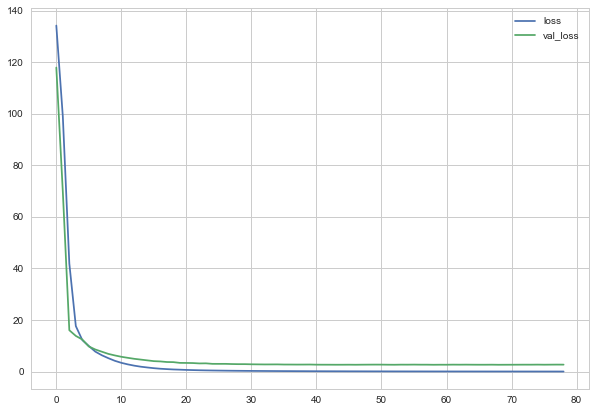

In [163]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [167]:
model.evaluate(X,y)

46/46 [==============================] - 0s 1ms/step - loss: 0.2829


0.2829359173774719